<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/MarketIndexTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!pip install -U finance-dataReader
#!pip install -U finance-dataReader==

In [70]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd
import numpy as np

plt.figure(figsize=(20,15)) 
#plt.style.available
#Another syntax on how to use the datareader command
#df = fdr.DataReader('NASDAQCOM', start_date, end_date, data_source='fred')

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [62]:
market_list = {'Nasdaq':'IXIC','S&P500':'US500', 'KOSPI':'KS11', 'KOSDAQ':'KQ11', 'Shanghai SEC':'SSEC', 'Hangseng':'HSI'	}

start_date = '2010-01-01'
end_date = date.today()

df_list = pd.DataFrame()

for name, code in market_list.items() :
  df = fdr.DataReader(code, start_date, end_date)['Close']
  df_list[name] = (df/df.max()).rolling(5).mean()


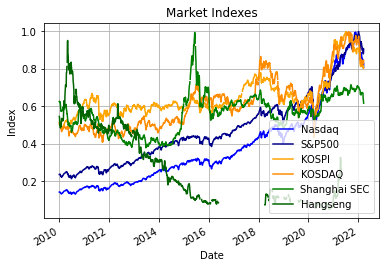

In [71]:
colors = ['blue','darkblue', 'orange', 'darkorange', 'green', 'darkgreen']

#print(df_list.info())

df_list.plot(color = colors)

plt.ylabel('Index')
plt.title("Market Indexes")
plt.legend()
plt.grid(True) 
plt.show()

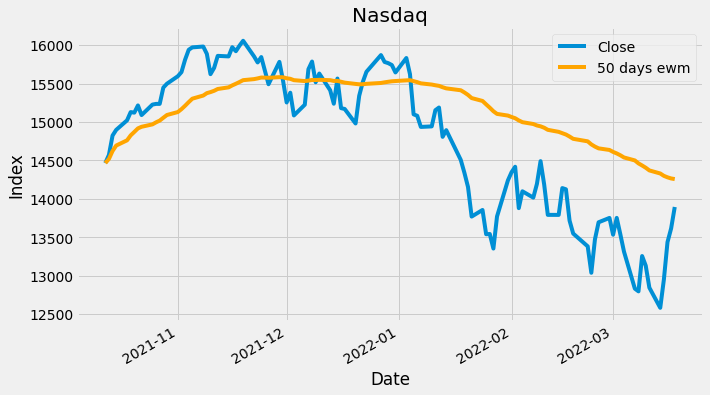

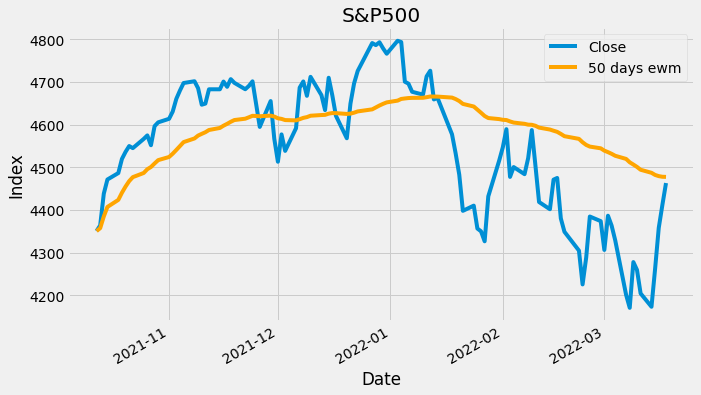

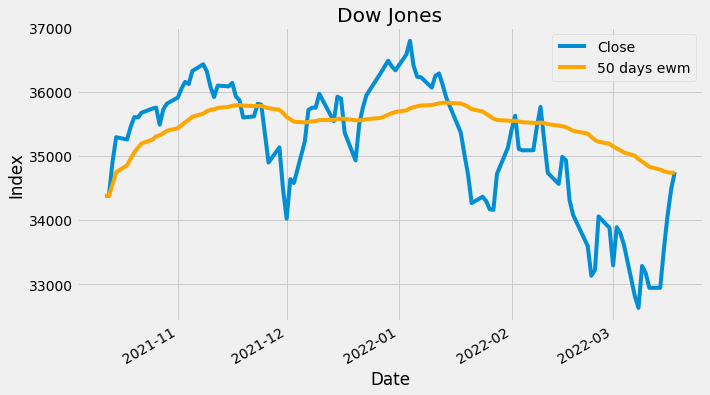

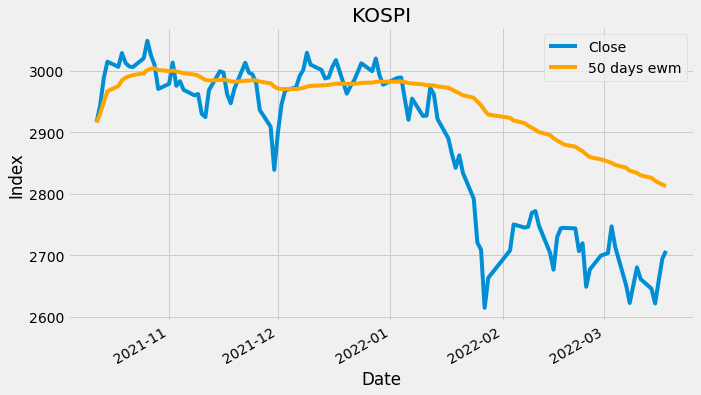

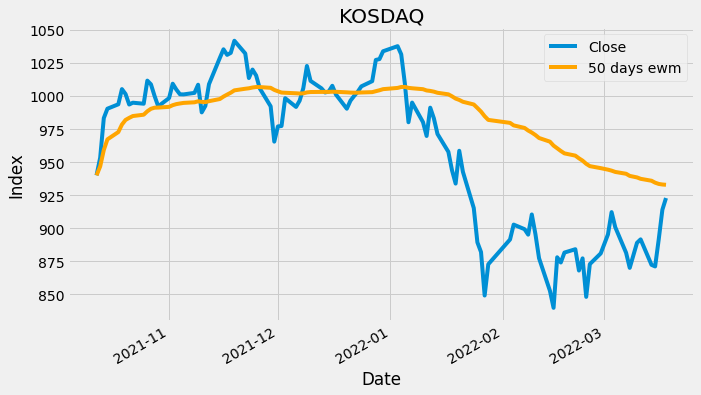

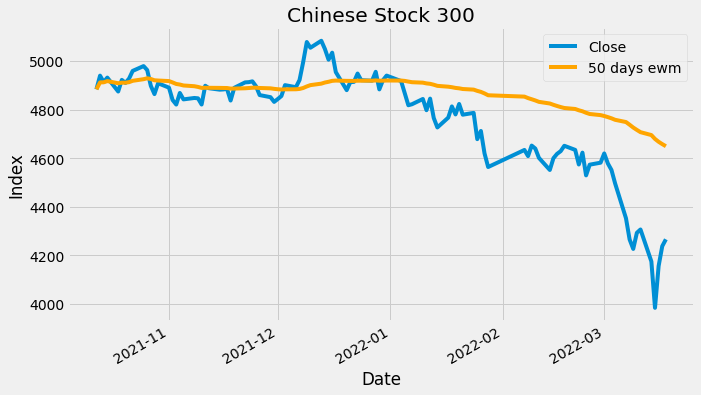

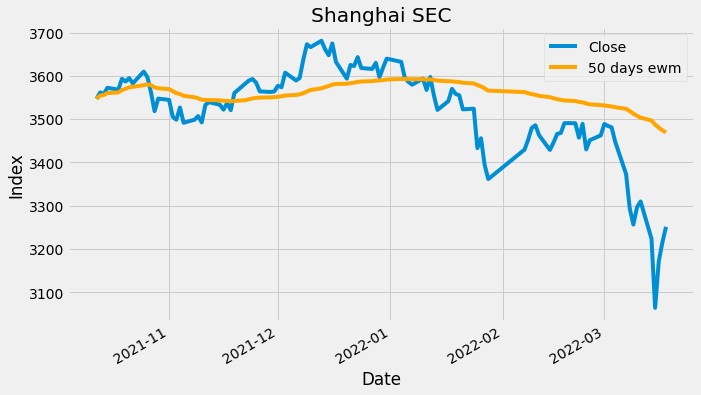

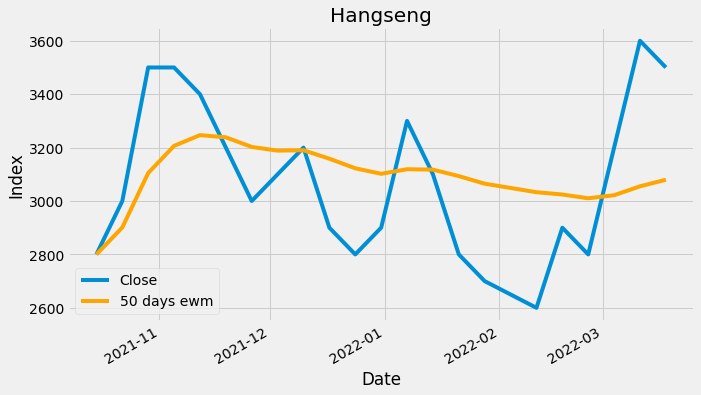

In [6]:
market_list = {'Nasdaq':'IXIC','S&P500':'US500', 'Dow Jones':'DJI', 'KOSPI':'KS11', 'KOSDAQ':'KQ11', 'Chinese Stock 300': 'CSI300', 'Shanghai SEC':'SSEC', 'Hangseng':'HSI'	}

start_date = '2021-10-12'
end_date = date.today()

with plt.style.context('fivethirtyeight'):
  plt.rcParams["axes.grid"] = True
  plt.rcParams["figure.figsize"] = (12,6)
  plt.rcParams['axes.unicode_minus'] = False
  plt.rcParams["axes.formatter.limits"] = -10000, 10000
  for name, code in market_list.items() :
    df = fdr.DataReader(code, start_date, end_date)
    #df.info()

    plt.figure(figsize=(10, 6))
    h0 = df['Close'].plot()
    Roll_Exponentional_Mean = df['Close'].ewm(50, min_periods=1).mean()
    h1 = Roll_Exponentional_Mean.plot(color='orange', label='50 days ewm')
    plt.ylabel('Index')
    plt.title(name)
    plt.legend()
    plt.grid(True)
    plt.show()


Displaying from 2021-08-01  to  2022-03-16


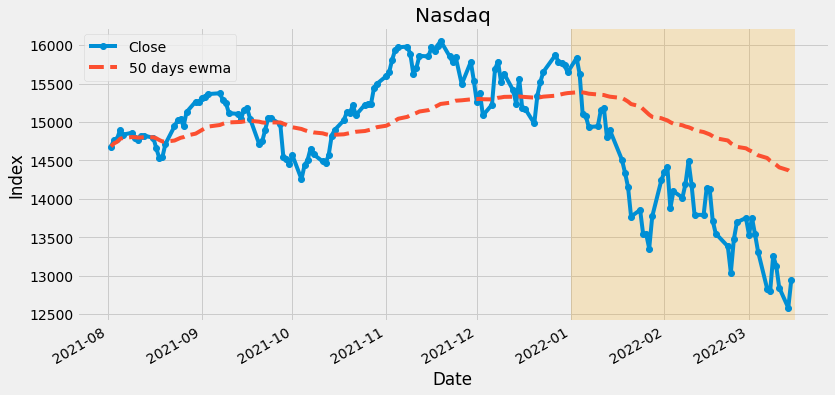

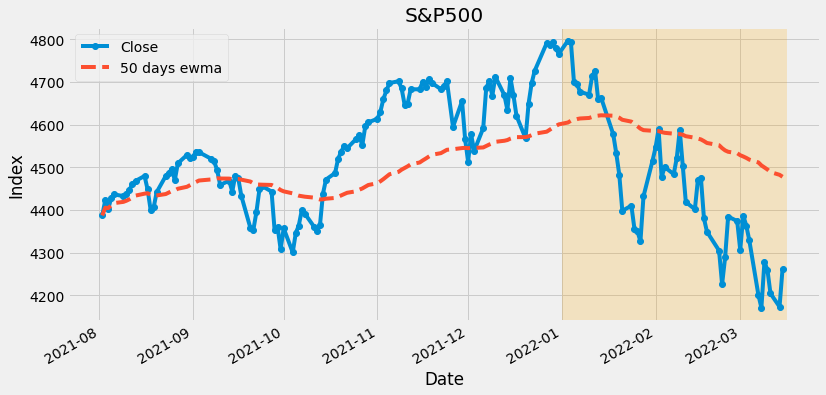

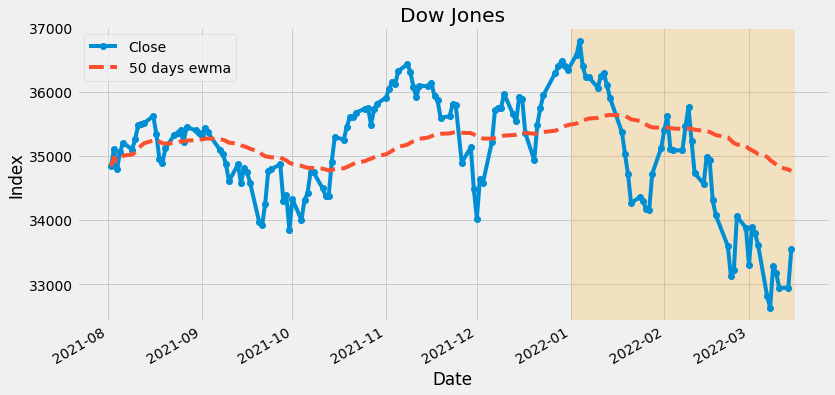

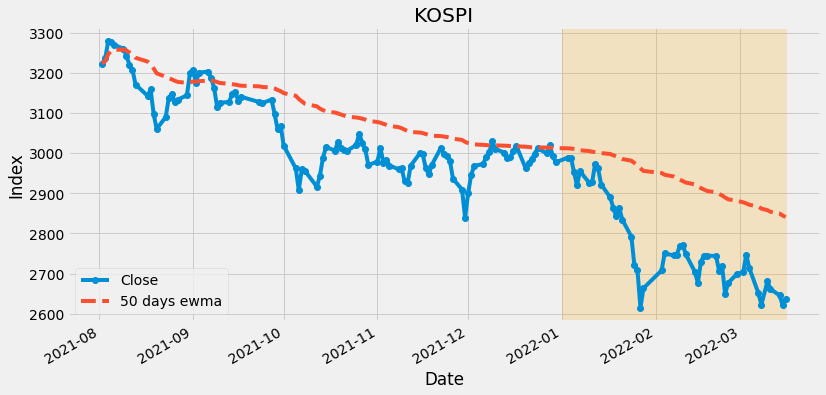

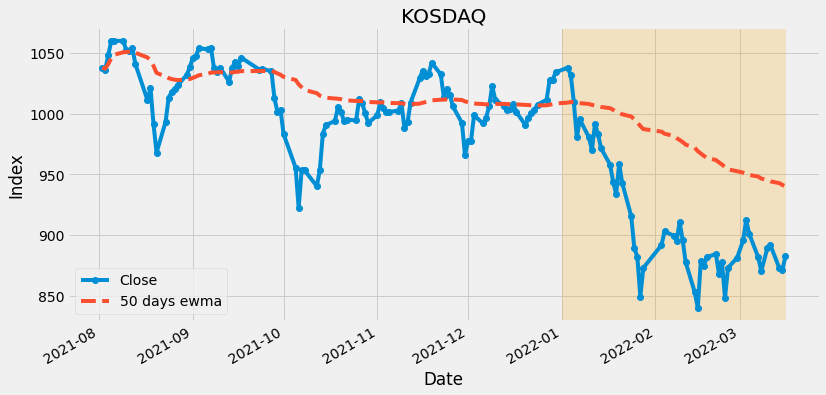

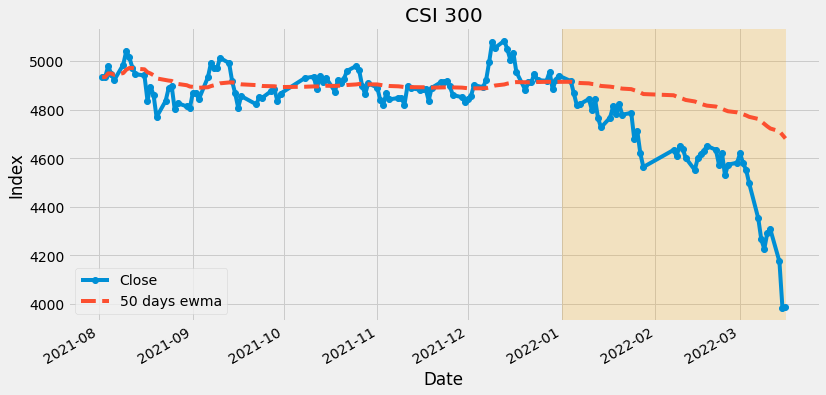

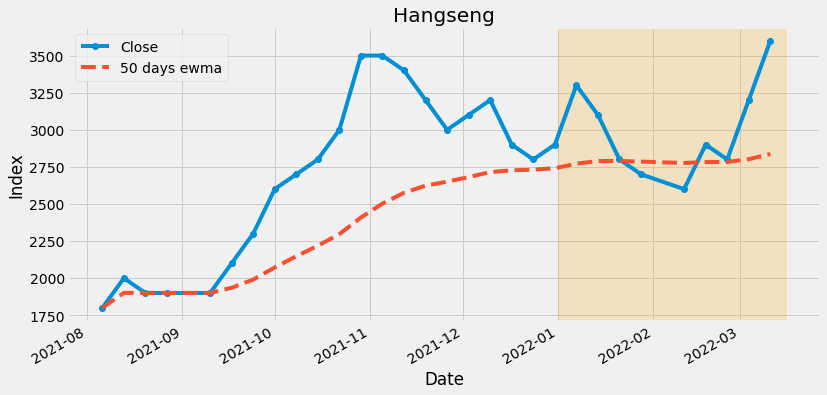

In [ ]:
with plt.style.context('fivethirtyeight'):
  plt.rcParams["axes.grid"] = True
  plt.rcParams["figure.figsize"] = (12,6)
  plt.rcParams['axes.unicode_minus'] = False
  plt.rcParams["axes.formatter.limits"] = -10000, 10000

  start_date='2021-08-01'
  highlight_date='2022-01-01'
  end_date=date.today()
  print("Displaying from", start_date, " to ", end_date)

  for name, code in market_list.items() :
    df = fdr.DataReader(code, start_date, end_date)
    df['ewm'] = df['Close'].ewm(50, min_periods=1).mean()
    #plt.figure(figsize=(10, 6))
    df = df[['Close','ewm']]
    ax = df['Close'].plot(marker='o')
    ax = ax.axvspan(highlight_date, end_date, color='orange', alpha=0.2)
    ax1 = df['ewm'].plot(linestyle='--', label='50 days ewma')
    
    plt.ylabel('Index')
    plt.title(name)
    plt.legend()
    plt.grid(True)
    plt.show()